<a href="https://colab.research.google.com/github/hawa1983/DATA-608/blob/main/Copy_of_DATA_608_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Mount Google Drive and Import Libraries

In [2]:
# Step 1: Mount Google Drive to access the CSV file
from google.colab import drive
#drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch


# Step 2: Load and Preprocess Data

In [3]:
# Step 3: Load the CSV file (adjust the path as needed)
file_path = '/content/IIJA FUNDING AS OF MARCH 2023.csv'
data = pd.read_csv(file_path)

# Step 4: Create a dictionary to map full state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Replace full state names with abbreviations
data['State'] = data['State'].map(state_abbreviations)


# Plot 1: Dot Plot of Per Capita Funding by State

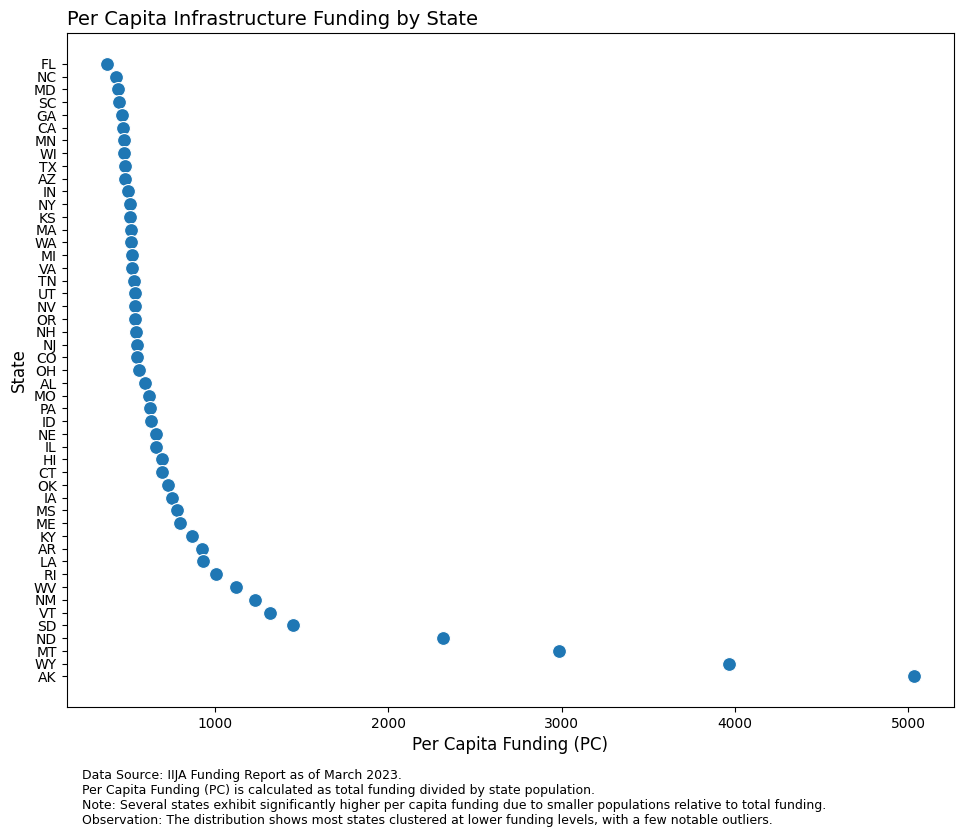

In [4]:
# Step 5: Plot 1 - Dot plot of Per Capita Funding by State (Abbreviations)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC', y='State', data=data, s=100)

# Simplify title
plt.title('Per Capita Infrastructure Funding by State', fontsize=14, loc='left')

# Keep axes labels shorter
plt.xlabel('Per Capita Funding (PC)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Adding footnotes as text in the plot
footnotes = (
    "Data Source: IIJA Funding Report as of March 2023.\n"
    "Per Capita Funding (PC) is calculated as total funding divided by state population.\n"
    "Note: Several states exhibit significantly higher per capita funding due to smaller populations relative to total funding.\n"
    "Observation: The distribution shows most states clustered at lower funding levels, with a few notable outliers."
)

# Position footnotes and use smaller text size to minimize clutter
plt.figtext(0.1, -0.05, footnotes, ha="left", fontsize=9, wrap=True)

# Add some padding between plot and footnotes
plt.tight_layout(pad=2.0)

plt.show()



# Plot 3: Scatter Plot of Total Funding vs Population

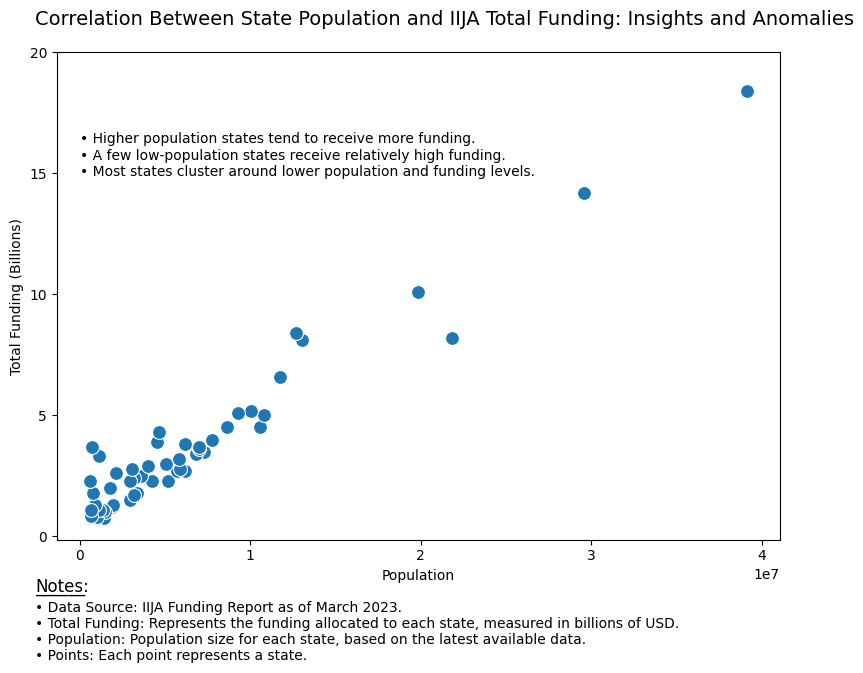

In [5]:
# Step 7: Plot 3 - Scatter plot of Total Funding vs Population with axis borders and infrequent tick marks
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x='Population', y='Total (Billions)', data=data, s=100)

# Keep the axis labels
plt.xlabel('Population')
plt.ylabel('Total Funding (Billions)')

# Add infrequent tick marks (sparse)
plt.xticks([0, 1e7, 2e7, 3e7, 4e7])  # X-axis ticks for Population (every 10 million)
plt.yticks([0, 5, 10, 15, 20])  # Y-axis ticks for Total Funding (every 5 billion)

# Ensure the spines (the plot boundaries) are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Step 8: Add concise bulleted analysis in the plot area
plt.text(0.9, 15,
    '• Higher population states tend to receive more funding.\n'
    '• A few low-population states receive relatively high funding.\n'
    '• Most states cluster around lower population and funding levels.',
    wrap=True, fontsize=10, horizontalalignment='left')

# Step 9: Add left-justified footnotes at the bottom of the figure
plt.figtext(0.05, -0.1,
    '• Data Source: IIJA Funding Report as of March 2023.\n'
    '• Total Funding: Represents the funding allocated to each state, measured in billions of USD.\n'
    '• Population: Population size for each state, based on the latest available data.\n'
    '• Points: Each point represents a state.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Step 10: Add underlined title atop the footnote
plt.figtext(0.05, 0.01,
    'Notes:',
    wrap=True, horizontalalignment='left', fontsize=12)

# Underline the title using a horizontal line
plt.figtext(0.05, 0.01, '______', fontsize=12, horizontalalignment='left')

# Plot title with left justification
plt.suptitle('Correlation Between State Population and IIJA Total Funding: Insights and Anomalies', x=0.05, ha='left', fontsize=14)

# Display the plot with the footnotes, title, and analysis
plt.tight_layout()
plt.show()


# Plot 4: Bar Chart for Infrastructure Grades with Count Annotations

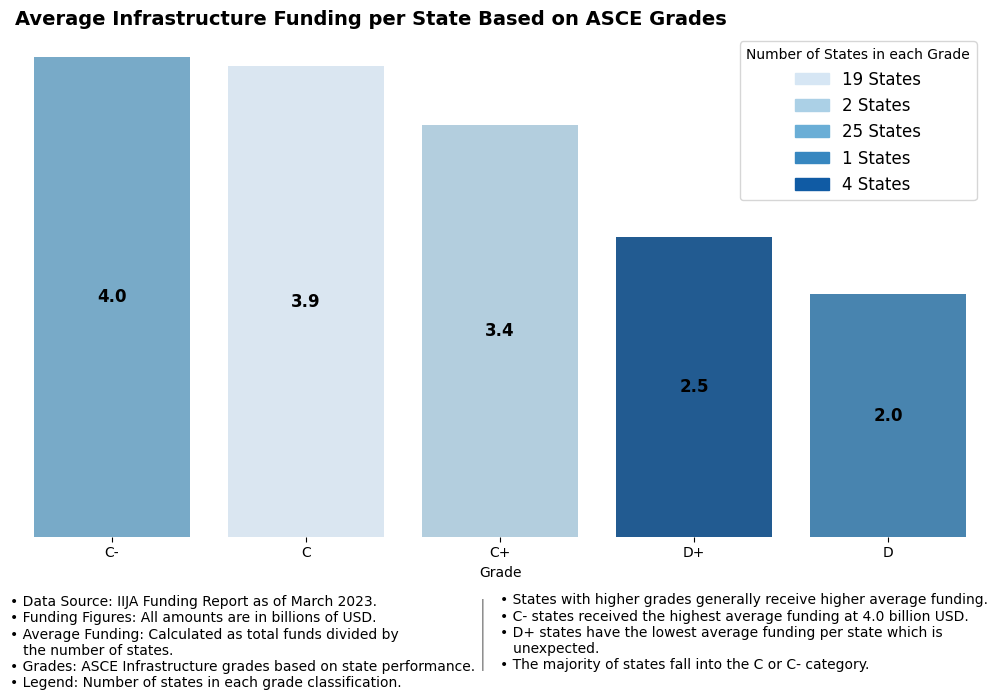

In [6]:
# Step 9: Create a new DataFrame for average spending per grade
avg_spending = data.groupby('Grade')['Total (Billions)'].mean().reset_index()

# Step 10: Create a new DataFrame for the number of states per grade
state_count = data['Grade'].value_counts().reset_index()
state_count.columns = ['Grade', 'Count']  # Rename columns to Grade and Count


# Step 11: Merge the two DataFrames on the 'Grade' column
merged_data = pd.merge(avg_spending, state_count, on='Grade')

# Step 12: Order the bars by spending from highest to lowest
grade_order = merged_data.sort_values(by='Total (Billions)', ascending=False)['Grade']

# Step 13: Bar chart for the distribution of average spending by grade
plt.figure(figsize=(10, 6))

# Plot the average spending per state in each grade using hue to avoid the warning
palette = sns.color_palette('Blues', len(grade_order))  # Generate the color palette
ax = sns.barplot(x='Grade', y='Total (Billions)', data=merged_data, hue='Grade', order=grade_order, palette=palette, legend=False)

# Add title aligned with the left edge of the chart
ax.set_title('Average Infrastructure Funding per State Based on ASCE Grades', fontsize=14, loc='left', fontweight='bold')

# Remove y-axis ticks and labels
ax.set(yticks=[], ylabel=None)

# Remove spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add spending values to the bars, centered vertically and horizontally
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Center the text
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Step 14: Create a custom legend with the number of states for each grade
legend_labels = [f'{row["Count"]} States' for _, row in merged_data.iterrows()]
legend_colors = [Patch(color=palette[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the custom legend ordered according to the bars
plt.legend(handles=legend_colors, loc='upper right', fontsize=12, title='Number of States in each Grade')

# Step 14: Add a taller vertical line between the footnotes and analysis
plt.figtext(0.48, -0.03, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.48, -0.06, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.48, -0.09, '|', fontsize=12, color='grey')  # Middle part
plt.figtext(0.48, -0.12, '|', fontsize=12, color='grey')  # Bottom part


# Step 16: Add left-justified footnotes at the bottom of the figure
plt.figtext(0.01, -0.15,
    '• Data Source: IIJA Funding Report as of March 2023.\n'
    '• Funding Figures: All amounts are in billions of USD.\n'
    '• Average Funding: Calculated as total funds divided by\n   the number of states.\n'
    '• Grades: ASCE Infrastructure grades based on state performance.\n'
    '• Legend: Number of states in each grade classification.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Step 17: Add bulletized analysis to the right of the footnotes
plt.figtext(0.5, -0.12,
    '• States with higher grades generally receive higher average funding.\n'
    '• C- states received the highest average funding at 4.0 billion USD.\n'
    '• D+ states have the lowest average funding per state which is\n   unexpected.\n'
    '• The majority of states fall into the C or C- category.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Display the plot with the footnotes, title, and analysis
plt.tight_layout()
plt.show()


# Plot 6: Average Per Capita Spending in each Grade

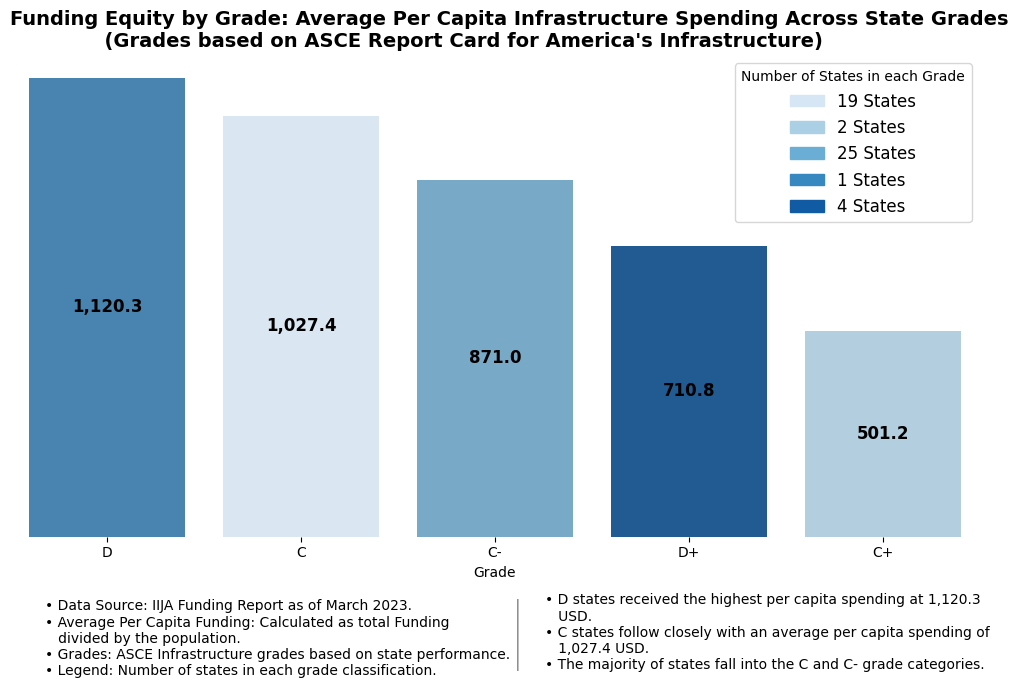

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Step 9: Create a new DataFrame for average spending per grade
avg_per_capita_spending = data.groupby("Grade")["PC"].mean().reset_index()

# Step 9: Merge the two DataFrames on the 'Grade' column
merged_data = pd.merge(avg_per_capita_spending, state_count, on='Grade')

# Step 10: Order the bars by per capita spending from highest to lowest
grade_order = merged_data.sort_values(by='PC', ascending=False)['Grade']

# Step 11: Bar chart for the distribution of average per capita spending by grade
plt.figure(figsize=(10, 6))

# Plot the average per capita spending per state in each grade using hue to avoid the warning
palette = sns.color_palette('Blues', len(grade_order))  # Generate the color palette
ax = sns.barplot(x='Grade', y='PC', data=merged_data, hue='Grade', order=grade_order, palette=palette, dodge=False)

# Add title aligned with the left edge of the chart
ax.set_title("Funding Equity by Grade: Average Per Capita Infrastructure Spending Across State Grades\n              (Grades based on ASCE Report Card for America's Infrastructure)", fontsize=14, loc='left', fontweight='bold')

# Remove y-axis ticks and labels
ax.set(yticks=[], ylabel=None)

# Remove spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add per capita spending values to the bars, centered vertically and horizontally
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Center the text
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Step 12: Add footnotes at the bottom of the chart (left side) aligned horizontally with the analysis
plt.figtext(0.05, -0.13,
    '• Data Source: IIJA Funding Report as of March 2023.\n'
    '• Average Per Capita Funding: Calculated as total Funding\n   divided by the population.\n'
    '• Grades: ASCE Infrastructure grades based on state performance.\n'
    '• Legend: Number of states in each grade classification.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Step 13: Add bulletized analysis summary to the right of the footnotes (aligned horizontally)
plt.figtext(0.55, -0.12,
    '• D states received the highest per capita spending at 1,120.3\n   USD.\n'
    '• C states follow closely with an average per capita spending of\n   1,027.4 USD.\n'
    '• The majority of states fall into the C and C- grade categories.',
    wrap=True, horizontalalignment='left', fontsize=10)

# Step 14: Add a taller vertical line between the footnotes and analysis
plt.figtext(0.52, -0.03, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.52, -0.06, '|', fontsize=12, color='grey')  # Top part
plt.figtext(0.52, -0.09, '|', fontsize=12, color='grey')  # Middle part
plt.figtext(0.52, -0.12, '|', fontsize=12, color='grey')  # Bottom part

# Step 14: Create a custom legend with the number of states for each grade
legend_labels = [f'{row["Count"]} States' for _, row in merged_data.iterrows()]
legend_colors = [Patch(color=palette[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the custom legend ordered according to the bars
plt.legend(handles=legend_colors, loc='upper right', fontsize=12, title='Number of States in each Grade')

# Display the plot with the footnotes, vertical line, and summary analysis
plt.tight_layout()
plt.show()
